In [1]:
import torch
import pandas as pd

In [2]:
cd ..

/home/yann/IVISpaces


In [3]:
from Data import get_setup

In [4]:
FBNN={'boston': {('FBNN', 'RMSE'): 2.378, ('FBNN', 'LPP'): -2.301},
      'concrete': {('FBNN', 'RMSE'): 4.935, ('FBNN', 'LPP'): -3.096},
      'energy': {('FBNN', 'RMSE'): 0.412, ('FBNN', 'LPP'): -0.684},
      'wine': {('FBNN', 'RMSE'): 0.673, ('FBNN', 'LPP'): -1.040},
      'yacht': {('FBNN', 'RMSE'): 0.607, ('FBNN', 'LPP'): -1.033},
     'navalC':{('FBNN', 'RMSE'): 0.00012, ('FBNN', 'LPP'): 7.130},
     'protein':{('FBNN', 'RMSE'): 4.326, ('FBNN', 'LPP'): -2.892},
       'kin8nm':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')},
       'powerplant':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')}

     }
sFBNN={'boston': {('FBNN', 'RMSE'): 0.104, ('FBNN', 'LPP'): 0.038},
      'concrete': {('FBNN', 'RMSE'): 0.180, ('FBNN', 'LPP'): 0.016},
      'energy': {('FBNN', 'RMSE'): 0.017, ('FBNN', 'LPP'): 0.020},
      'wine': {('FBNN', 'RMSE'): 0.014, ('FBNN', 'LPP'): 0.013},
      'yacht': {('FBNN', 'RMSE'): 0.068, ('FBNN', 'LPP'): 0.033},
      'navalC':{('FBNN', 'RMSE'): 0.0000, ('FBNN', 'LPP'): 0.024},
     'protein':{('FBNN', 'RMSE'): 0.019, ('FBNN', 'LPP'): 0.004},
       'kin8nm':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')},
       'powerplant':{('FBNN', 'RMSE'): float('Nan'), ('FBNN', 'LPP'): float('Nan')}

     }

# Experiment 1 #

## metrics on test #

In [5]:
RESULTS=torch.load('Results/Exp1/UCI_Exp1_2020-11-09-19:24_metrics.pt')

In [6]:
methods=['HMC','NN-HyVI','FuNN-HyVI']#torch.distributions.kl.kl_divergence(middle,certain)#'EnsembleB',,'FuNNeVI-GP']#,'FBNN']#['FuNNeVI',]##
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,metrics])#, names=['method', 'metric']
index_rmse=pd.MultiIndex.from_product([methods,['RMSE']])
index_lpp=pd.MultiIndex.from_product([methods,['LPP']])


In [7]:
df_rmse=pd.DataFrame(RESULTS[0], index=index_rmse).transpose()
df_rmse_std=pd.DataFrame(RESULTS[1], index=index_rmse).transpose()
df_lpp=pd.DataFrame(RESULTS[0], index=index_lpp).transpose()
df_lpp_std=pd.DataFrame(RESULTS[1], index=index_lpp).transpose()

In [9]:
df_rmse.style.highlight_min(axis=1)

,HMC,NN-HyVI,FuNN-HyVI
,RMSE,RMSE,RMSE
boston,2.589734,2.658466,2.720910
concrete,6.918048,6.099496,5.577996
energy,2.632988,0.643504,0.493364
wine,0.584871,0.728478,0.737909
yacht,3.860517,1.341663,1.140585


In [10]:
df_lpp.style.highlight_max(axis=1)

,HMC,NN-HyVI,FuNN-HyVI
,LPP,LPP,LPP
boston,-4.111919,-4.074820,-4.077683
concrete,-5.260302,-5.244427,-5.243293
energy,-3.606998,-3.563714,-3.562065
wine,-0.908195,-1.543249,-1.672269
yacht,-4.069409,-4.001945,-4.001012


In [11]:
import numpy as np

for i in df_rmse.columns:
    df_rmse[i] = df_rmse[i].round(3).astype(str)+ "±" + ((df_rmse_std[i]/np.sqrt(3)).round(3)).astype(str)+""
for i in df_lpp.columns:
    df_lpp[i] = df_lpp[i].round(3).astype(str)+ "±" + ((df_lpp_std[i]/np.sqrt(3)).round(5)).astype(str)+""
    

In [12]:
print(df_rmse.to_latex())

\begin{tabular}{llll}
\toprule
{} &        HMC &      NN-HyVI &    FuNN-HyVI \\
{} &       RMSE &         RMSE &         RMSE \\
\midrule
boston   &   2.59±nan &  2.658±0.013 &  2.721±0.052 \\
concrete &  6.918±nan &   6.099±0.16 &  5.578±0.083 \\
energy   &  2.633±nan &  0.644±0.026 &  0.493±0.003 \\
wine     &  0.585±nan &  0.728±0.008 &  0.738±0.021 \\
yacht    &  3.861±nan &  1.342±0.014 &  1.141±0.188 \\
\bottomrule
\end{tabular}



In [13]:
print(df_lpp.to_latex())

\begin{tabular}{llll}
\toprule
{} &         HMC &         NN-HyVI &       FuNN-HyVI \\
{} &         LPP &             LPP &             LPP \\
\midrule
boston   &  -4.112±nan &    -4.075±5e-05 &  -4.078±0.00138 \\
concrete &   -5.26±nan &  -5.244±0.00022 &    -5.243±7e-05 \\
energy   &  -3.607±nan &  -3.564±0.00026 &    -3.562±1e-05 \\
wine     &  -0.908±nan &  -1.543±0.03781 &  -1.672±0.08832 \\
yacht    &  -4.069±nan &  -4.002±0.00012 &  -4.001±0.00027 \\
\bottomrule
\end{tabular}



## Predictive epistemic entropy

In [14]:
Entropy_=torch.load('Results/Exp1/UCI_Exp1_2020-11-09-19:24_pred_entropy.pt')

methods=['HMC','NN-HyVI','FuNN-HyVI']
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
index=pd.MultiIndex.from_product([methods,datasets])


df=pd.DataFrame(data=Entropy_, index=methods)
Entropy=df.to_dict()


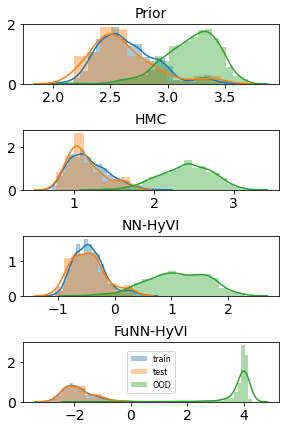

In [17]:
from Metrics import batch_entropy_nne
from torch import nn
from Models import get_mlp
import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 14,
              'xtick.labelsize' : 14,
              'ytick.labelsize' : 14,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_methods=len(methods)+1
fig,ax=plt.subplots(n_methods,1,figsize=(4,6),squeeze=False)


def OOD_sampler(x_train,n_ood):
    M = x_train.max(0, keepdim=True)[0]
    m = x_train.min(0, keepdim=True)[0]
    X = torch.rand(n_ood,x_train.shape[1]).to(device) * (M-m) + m                           
    return X

def EntropyKDE(ax, theta, X,  model, label):
    Y=[model(X[i],theta) for i in range(len(X))]
    H=[BatchEntropy(y.transpose(0,1),k=30) for y in Y]
    for i in range(len(H)):
        ax=sns.distplot(H[i].cpu(), label=label[i], ax=ax)

split_nb=0
label=['train', 'test', 'OOD']
dataset, dic ='concrete', Entropy['concrete']
m=0
setup_ = get_setup(dataset)
setup=setup_.Setup(device)
x_train, y_train=setup.train_data()
x_test, y_test=setup.test_data()


input_dim=x_train.shape[1]
param_count, model = get_mlp(input_dim, layerwidth, nblayers, activation) 
prior_theta=0.5*torch.randn(1000,param_count).to(device)

X=[x_train,x_test,OOD_sampler(x_train,1000)]
Y=[model(x,prior_theta) for x in X]

H=[batch_entropy_nne(y.transpose(0,1),k=30) for y in Y]

ax_=ax.flat
for i in range(len(H)):
    sns.distplot(H[i].cpu(), label=label[i], ax=ax_[m])
#ax_[0].set_ylabel('Prior',{'fontstyle':'italic'})
ax_[0].set_title('Prior')

#ax_[m].set_title(dataset)

m+=1
for method, Hs in dic.items():
    
    H=Hs[split_nb]
    for i in range(len(H)):
        sns.distplot(H[i].cpu(), label=label[i], ax=ax_[m])
    if method=='FuNNeVI' or method== 'GeNNeVI':
        #ax_[m].set_ylabel(method, {'fontweight':'bold'})
        ax_[m].set_title(method)
    else:
        #ax_[m].set_ylabel(method)
        ax_[m].set_title(method)

    m+=1

#handles, labels = ax_[0].get_legend_handles_labels()

#fig.legend(handles, labels, title='input distribution',title_fontsize=10,  loc=(.75,0.1),prop={'size': 10})
ax_[m-1].legend(loc='center', prop={'size': 8})
fig.tight_layout(pad=0.8)
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/Exp1/UCI_PredictiveEntropy_Exp1_{}.pdf".format(dataset), dpi=600)

plt.show()

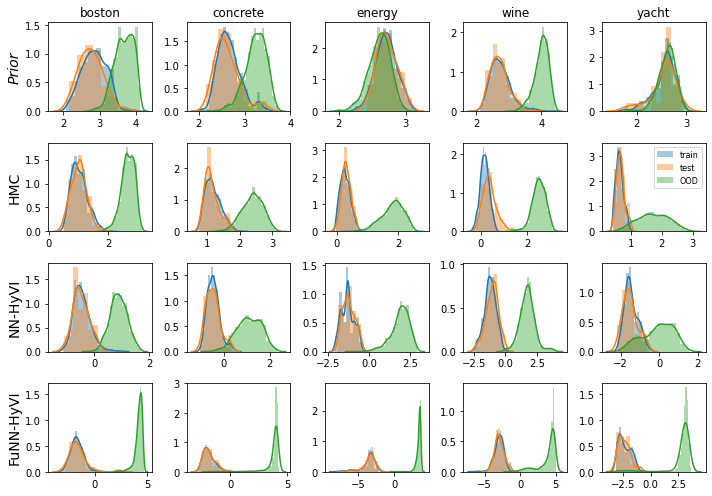

In [38]:
import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)
method_names=['HMC','NN-HyVI','FuNN-HyVI']

n_datasets=5
n_methods=len(method_names)+1
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,7),squeeze=False)


def OOD_sampler(x_train,n_ood):
    M = x_train.max(0, keepdim=True)[0]
    m = x_train.min(0, keepdim=True)[0]
    X = torch.rand(n_ood,x_train.shape[1]).to(device) * (M-m) + m                           
    return X

def EntropyKDE(ax, theta, X,  model, label):
    Y=[model(X[i],theta) for i in range(len(X))]
    H=[BatchEntropy(y.transpose(0,1),k=30) for y in Y]
    for i in range(len(H)):
        ax=sns.distplot(H[i].cpu(), label=label[i], ax=ax)

label=['train', 'test', 'OOD']

d=0
for dataset, dic in Entropy.items():# ='boston', Entropy['boston']
    m=0

    setup_ = get_setup(dataset)
    setup=setup_.Setup(device)
    x_train, y_train=setup.train_data()
    x_test, y_test=setup.test_data()


    input_dim=x_train.shape[1]
    param_count, model = get_mlp(input_dim, layerwidth, nblayers, activation) 
    prior_theta=0.5*torch.randn(1000,param_count).to(device)

    X=[x_train,x_test,OOD_sampler(x_train,1000)]
    Y=[model(x,prior_theta) for x in X]

    H=[batch_entropy_nne(y.transpose(0,1),k=30) for y in Y]

    for i in range(len(H)):
        sns.distplot(H[i].cpu(), label=label[i], ax=ax[0,d])
    ax[0,0].set_ylabel('Prior',{'fontstyle':'italic'})
    #ax_[0].set_title('Prior')

    ax[0,d].set_title(dataset)

    m+=1
    for method, Hs in dic.items():
        H=Hs[0]
        for i in range(len(H)):
            sns.distplot(H[i].cpu(), label=label[i], ax=ax[m,d])        
        if d==0:
            if method=='FuNNeVI' or method== 'GeNNeVI':
                ax[m,d].set_ylabel(method_names[m-1], {'fontweight':'bold'})
            else:
                ax[m,d].set_ylabel(method_names[m-1])

        m+=1
    d+=1
ax[1,d-1].legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/Exp1/UCI_PredictiveEntropy_Exp1.pdf", dpi=600)

plt.show()

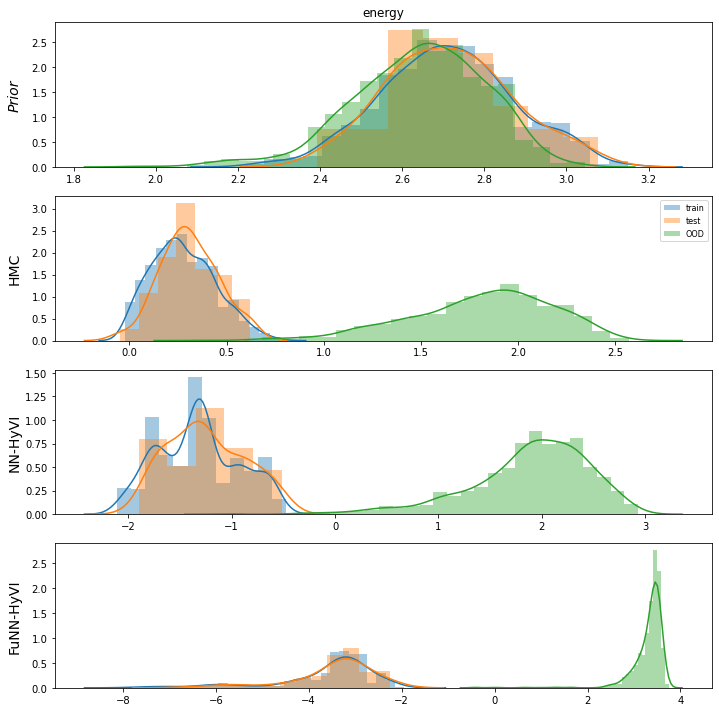

In [34]:
import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)
method_names=['HMC','NN-HyVI','FuNN-HyVI']

n_datasets=1
n_methods=len(method_names)+1
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,10),squeeze=False)


def OOD_sampler(x_train,n_ood):
    M = x_train.max(0, keepdim=True)[0]
    m = x_train.min(0, keepdim=True)[0]
    X = torch.rand(n_ood,x_train.shape[1]).to(device) * (M-m) + m                           
    return X

def EntropyKDE(ax, theta, X,  model, label):
    Y=[model(X[i],theta) for i in range(len(X))]
    H=[BatchEntropy(y.transpose(0,1),k=30) for y in Y]
    for i in range(len(H)):
        ax=sns.distplot(H[i].cpu(), label=label[i], ax=ax)

label=['train', 'test', 'OOD']

d=0
dataset, dic ='energy', Entropy['energy']
m=0

setup_ = get_setup(dataset)
setup=setup_.Setup(device)
x_train, y_train=setup.train_data()
x_test, y_test=setup.test_data()


input_dim=x_train.shape[1]
param_count, model = get_mlp(input_dim, layerwidth, nblayers, activation) 
prior_theta=0.5*torch.randn(1000,param_count).to(device)

X=[x_train,x_test,OOD_sampler(x_train,1000)]
Y=[model(x,prior_theta) for x in X]

H=[batch_entropy_nne(y.transpose(0,1),k=30) for y in Y]

for i in range(len(H)):
    sns.distplot(H[i].cpu(), label=label[i], ax=ax[0,d])
ax[0,0].set_ylabel('Prior',{'fontstyle':'italic'})
#ax_[0].set_title('Prior')

ax[0,d].set_title(dataset)

m+=1
for method, Hs in dic.items():
    H=Hs[0]
    for i in range(len(H)):
        sns.distplot(H[i].cpu(), label=label[i], ax=ax[m,d])        
    if d==0:
        if method=='FuNNeVI' or method== 'GeNNeVI':
            ax[m,d].set_ylabel(method_names[m-1], {'fontweight':'bold'})
        else:
            ax[m,d].set_ylabel(method_names[m-1])

    m+=1
d+=1
ax[1,d-1].legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
#plt.savefig("Results/Exp1/UCI_PredictiveEntropy_Exp1.pdf", dpi=600)

plt.show()

## ROC AUC

In [57]:
Entropy_=torch.load('Results/Exp1/UCI_Exp1_2020-11-09-19:24_pred_entropy.pt')

methods=['HMC','NN-HyVI','FuNN-HyVI']
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
index=pd.MultiIndex.from_product([methods,datasets])


df=pd.DataFrame(data=Entropy_, index=methods)
Entropy=df.to_dict()


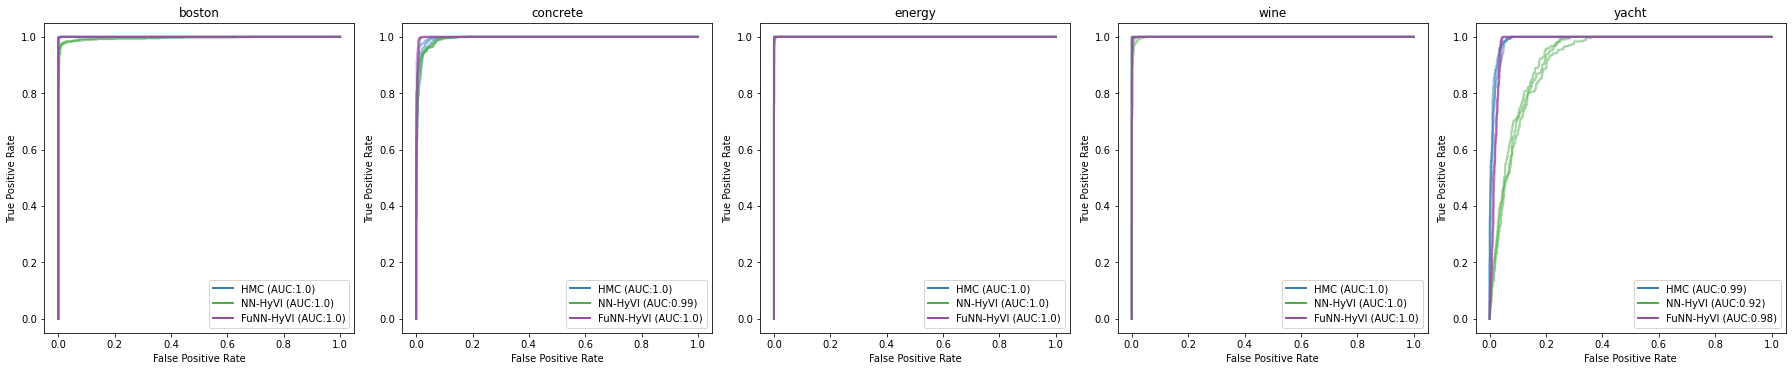

In [41]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in range(3):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(), drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+' (AUC:{})'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig("Results/Exp1/ROC.pdf", bbox_inches='tight', dpi=600)

plt.show()

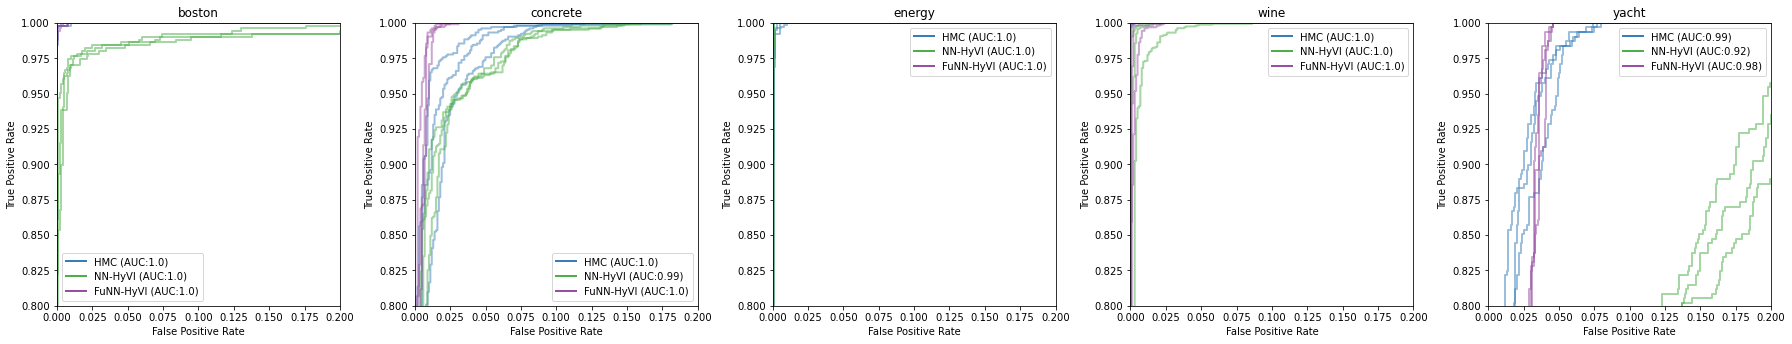

In [7]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in range(3):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(), drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_xlim(0.,0.2)
            ax[d].set_ylim(0.8,1.0)
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+' (AUC:{})'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
fig.savefig("Results/Exp1/ROC_zoom.pdf", bbox_inches='tight', dpi=600)

plt.show()

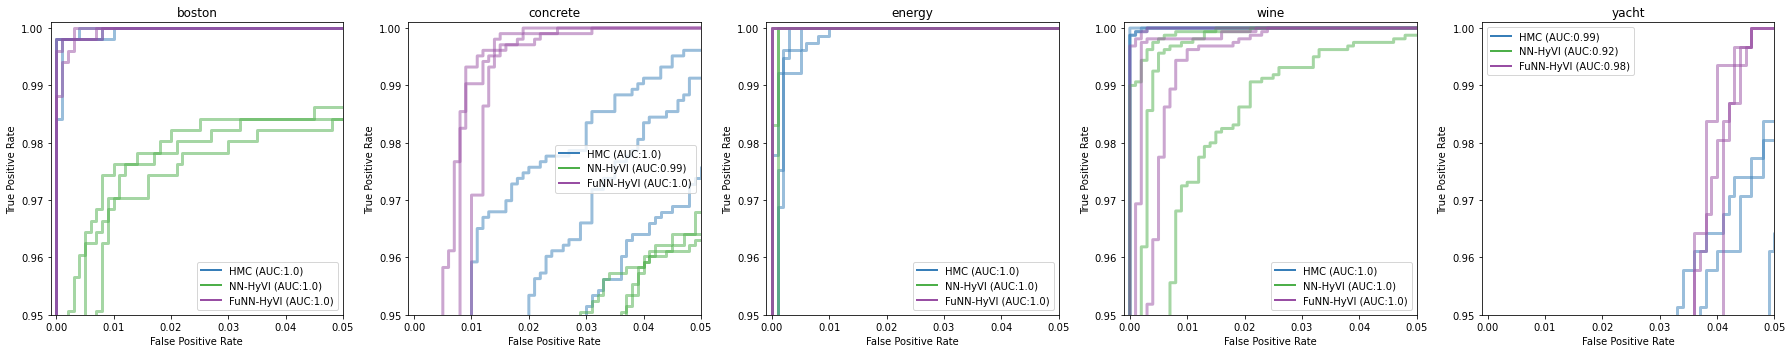

In [13]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in range(3):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(), drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=3,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_xlim(-0.001,0.05)
            ax[d].set_ylim(0.95,1.001)
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+' (AUC:{})'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
fig.savefig("Results/Exp1/ROC_zoom2.pdf", bbox_inches='tight', dpi=600)

plt.show()

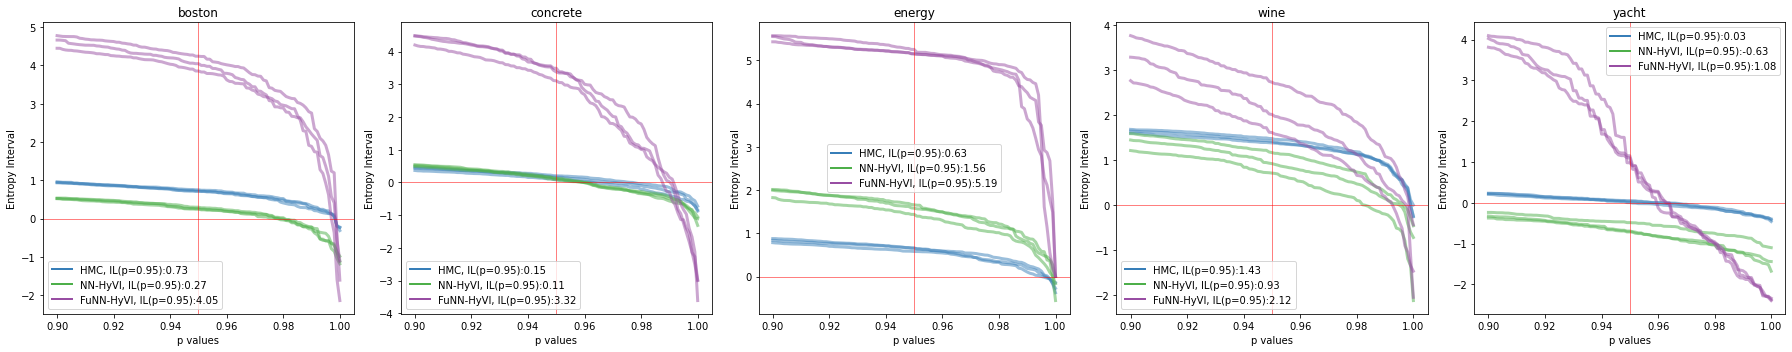

In [58]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        IntervalLength=[]
        for nb_split in range(3):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            p_values=np.linspace(0.9,1.,101)
            #print(p_values[50])
            #print(tpr,thresholds)
            tp_above=np.asarray(tpr>=np.expand_dims(p_values,-1))
            index_min_tp_above_per_p_value=[np.nonzero(tp_above[i])[0].min() for i in range(101)]
            tp_thresh_values=np.array([thresholds[i] for i in index_min_tp_above_per_p_value])
            tn_above=np.asarray(1-fpr>=np.expand_dims(p_values,-1))
            index_min_tn_above_per_p_value=[np.nonzero(tn_above[i])[0].max() for i in range(101)]
            tn_thresh_values=np.array([thresholds[i] for i in index_min_tn_above_per_p_value])
            ax[d].plot(p_values, tp_thresh_values-tn_thresh_values, lw=3,color=cmap(m+1), alpha=0.5)
       #     ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
       #     ax[d].set_aspect('equal', adjustable='box')
            IntervalLength.append(tp_thresh_values[50]-tn_thresh_values[50])
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+', IL(p=0.95):{:.2f}'.format(np.mean(IntervalLength)))
    ax[d].axhline(0., color='red', lw=0.5)
    ax[d].axvline(0.95, color='red', lw=0.5)


    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('p values')
    ax[d].set_ylabel('Entropy Interval')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
fig.savefig("Results/Exp1/IntervalLength.pdf", bbox_inches='tight', dpi=600)

plt.show()

## Entropy of posterior distribution ## 

In [46]:
H=torch.load('Results/Exp1/UCI_Exp1_2020-11-09-19:24_post_entropy.pt')


In [47]:
methods=['HMC','NN-HyVI','FuNN-HyVI']
metrics=['paramH','funH']#
index_p=pd.MultiIndex.from_product([methods,['paramH']])
index_f=pd.MultiIndex.from_product([methods,['funH']])
df_p=pd.DataFrame(H[0], index=index_p).transpose()
df_f=pd.DataFrame(H[0], index=index_f).transpose()

df_p_std=pd.DataFrame(H[1], index=index_p).transpose()
df_f_std=pd.DataFrame(H[1], index=index_f).transpose()


In [48]:
df=df_p
df_std=df_p_std
index=index_p
for i in df[index].columns:
    df[i] = df[i].round(0).astype(str)+ "±" + ((df_std[i]/np.sqrt(3)).round(0)).astype(str)+""

In [49]:
print(df.to_latex())

\begin{tabular}{llll}
\toprule
{} &        HMC &      NN-HyVI &      FuNN-HyVI \\
{} &     paramH &       paramH &         paramH \\
\midrule
boston   &  971.0±0.0 &   1573.0±6.0 &     364.0±46.0 \\
concrete &  636.0±0.0 &   1086.0±0.0 &     374.0±13.0 \\
energy   &  628.0±0.0 &   1096.0±1.0 &     271.0±32.0 \\
wine     &  618.0±0.0 &  1472.0±16.0 &  -1516.0±105.0 \\
yacht    &  502.0±0.0 &    783.0±5.0 &     124.0±50.0 \\
\bottomrule
\end{tabular}



In [50]:
df=df_f
df_std=df_f_std
index=index_f
for i in df[index].columns:
    df[i] = df[i].round(0).astype(str)+ "±" + ((df_std[i]/np.sqrt(3)).round(0)).astype(str)+""

In [51]:
print(df.to_latex())

\begin{tabular}{llll}
\toprule
{} &         HMC &      NN-HyVI &   FuNN-HyVI \\
{} &        funH &         funH &        funH \\
\midrule
boston   &   -52.0±1.0 &   -397.0±1.0 &   301.0±7.0 \\
concrete &  -107.0±1.0 &   -435.0±8.0 &   272.0±2.0 \\
energy   &  -226.0±1.0 &  -284.0±15.0 &   167.0±3.0 \\
wine     &   -25.0±0.0 &   -241.0±4.0 &  282.0±15.0 \\
yacht    &  -242.0±0.0 &   -674.0±7.0 &   96.0±15.0 \\
\bottomrule
\end{tabular}



## kl divergence results ##

In [52]:
DIV, PDIV=torch.load('Results/Exp1/UCI_Exp1_2020-11-09-19:24_kldiv.pt')


In [53]:
methods=['NN-HyVI','FuNN-HyVI']
datasets=['boston', 'concrete', 'energy', 'wine', 'yacht']
metrics=['KL(-,HMC)','KL(HMC,-)','KL(-,-)']
index=pd.MultiIndex.from_product([methods,metrics])

div=pd.DataFrame(DIV[0], index=index).transpose()
pdiv=pd.DataFrame(PDIV[0],index=index).transpose()
div_=pd.DataFrame(DIV[1], index=index).transpose()
pdiv_=pd.DataFrame(PDIV[1],index=index).transpose()
Div=div
Div_=div_

In [54]:
lat=Div.copy()

In [55]:
for i in Div.columns:
    lat[i] = Div[i].round(1).astype(str)+ "±" + ((Div_[i]/np.sqrt(3)).round(1)).astype(str)+""

In [56]:
print(lat.to_latex())

\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{l}{NN-HyVI} & \multicolumn{3}{l}{FuNN-HyVI} \\
{} &   KL(-,HMC) &   KL(HMC,-) &     KL(-,-) &   KL(-,HMC) &  KL(HMC,-) &   KL(-,-) \\
\midrule
boston   &    25.8±0.9 &   258.9±1.8 &    20.3±2.1 &   282.5±6.3 &  -15.1±2.3 &  14.6±5.3 \\
concrete &     8.2±0.4 &   248.7±6.6 &    13.1±3.9 &   311.2±2.1 &  -33.5±0.6 &   3.3±1.1 \\
energy   &   65.4±21.7 &  143.5±14.1 &   92.2±19.2 &   321.8±2.9 &  -29.1±0.9 &   2.9±2.0 \\
wine     &  157.3±11.0 &  412.2±13.0 &  376.6±11.1 &  252.3±19.8 &   85.4±6.0 &  28.2±3.1 \\
yacht    &    21.2±3.7 &   344.3±6.9 &   39.1±13.2 &  277.2±13.8 &   -2.7±5.3 &  8.2±10.3 \\
\bottomrule
\end{tabular}



# Experiment 2: Small 

In [57]:
RESULTS, STDS=torch.load('Results/Exp2/UCI_small_Exp2_2020-11-06-14:48_metrics.pt')

for key in RESULTS.keys():
    print(key)

boston
concrete
energy
wine
yacht


In [58]:
for dataset in RESULTS.keys():
    RESULTS[dataset].update(FBNN[dataset])
    #RESULTS[dataset].update(RESULTS_[dataset])

for dataset in STDS.keys():
    STDS[dataset].update(sFBNN[dataset])

In [59]:
res=pd.DataFrame(RESULTS).transpose()

In [60]:
stds=pd.DataFrame(STDS).transpose()

In [61]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI', 'FBNN']


In [62]:
import numpy as np
metrics=['RMSE']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
res[index].style.highlight_min(axis=1)       
#print(res_[index].to_latex())

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI,FBNN
,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE
boston,3.483,3.604,3.926,3.936,4.095,4.268,2.378
concrete,5.052,4.109,5.148,4.384,4.462,4.737,4.935
energy,1.448,0.418,0.506,0.418,0.427,0.467,0.412
wine,0.628,0.645,0.650,0.734,0.760,0.866,0.673
yacht,0.901,0.715,1.201,0.644,0.589,0.947,0.607


In [63]:
metrics=['LPP']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
res[index].style.highlight_max(axis=1)       
#print(res_[index].to_latex())

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI,FBNN
,LPP,LPP,LPP,LPP,LPP,LPP,LPP
boston,-2.675,-3.740,-2.909,-11.510,-4.811,-11.889,-2.301
concrete,-3.023,-7.572,-3.097,-3.449,-3.135,-3.421,-3.096
energy,-2.111,-3.135,-0.759,-0.861,-0.567,-0.901,-0.684
wine,-2.007,-2.339,-0.991,-1.818,-1.442,-2.277,-1.040
yacht,-2.286,-0.903,-1.644,-10.848,-0.681,-3.014,-1.033


In [64]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
metrics=['time [s]']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round().astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round()).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
    
print(res_[index].to_latex())

\begin{tabular}{lllllll}
\toprule
{} & McDropOut &   Ensemble &        MFVI &   FuNN-MFVI &    NN-HyVI &   FuNN-HyVI \\
{} &  time [s] &   time [s] &    time [s] &    time [s] &   time [s] &    time [s] \\
\midrule
boston   &  11.0±0.0 &  191.0±1.0 &   159.0±4.0 &   206.0±7.0 &   85.0±2.0 &   141.0±6.0 \\
concrete &  18.0±0.0 &  365.0±1.0 &   286.0±6.0 &   291.0±9.0 &  159.0±6.0 &  249.0±10.0 \\
energy   &  13.0±0.0 &  273.0±1.0 &   217.0±3.0 &  198.0±11.0 &  104.0±4.0 &  229.0±10.0 \\
wine     &  25.0±0.0 &  565.0±1.0 &  432.0±15.0 &  494.0±16.0 &  306.0±8.0 &  466.0±16.0 \\
yacht    &   9.0±0.0 &  116.0±0.0 &    85.0±2.0 &   104.0±5.0 &   51.0±3.0 &    74.0±4.0 \\
\bottomrule
\end{tabular}



## Predictive Epistemic Entropy #

In [65]:
Entropy=torch.load('Results/Exp2/UCI_small_Exp2_2020-11-06-14:48_entropy.pt')

In [66]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
datasets=['boston', 'concrete', 'energy','wine', 'yacht']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()


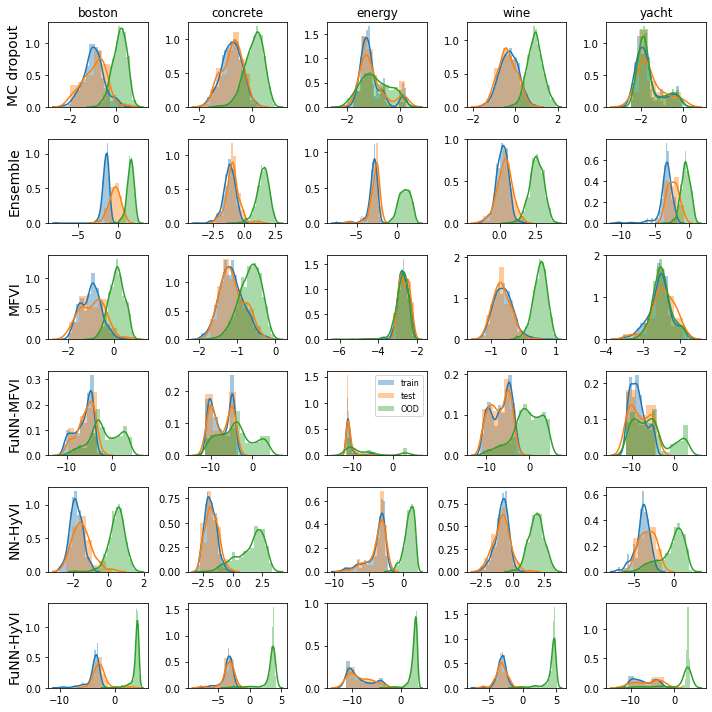

In [67]:
from Models import get_mlp
from torch import nn


import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=len(datasets)
n_methods=len(methods)
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,10),squeeze=False)


method_names=['MC dropout','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']

label=['train', 'test', 'OOD']
split=5

d=0
for dataset, dic in Entropy.items():
    m=0
    ax[m,d].set_title(dataset)
    for method, Hs in dic.items():
        H=Hs[split]
        for i in range(len(H)):
            sns.distplot(H[i].cpu(), label=label[i], ax=ax[m,d], kde=True)#, color=colors[i])#, hist=False, norm_hist=True)#color=colors[i],
            if d ==0:
                if method=='FuNNeVI' or method== 'GeNNeVI':
                    ax[m,d].set_ylabel(method_names[m], {'fontweight':'bold'})
                else:
                    ax[m,d].set_ylabel(method_names[m])
        m+=1
        
    d+=1
ax[3,2].legend(loc='upper right', prop={'size': 8})#bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/Exp2/UCIsmall_PredictiveEntropy_Exp2.pdf", dpi=600)
#plt.subplots_adjust(top=.9)
#plt.suptitle('Posterior Predictive Entropy Distributions')
plt.show()

## Accuracy in OOD detection

In [55]:
Entropy=torch.load('Results/Exp2/UCI_small_Exp2_2020-11-06-14:48_entropy.pt')
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
#methods=['Ensemble','NN-HyVI','FuNN-HyVI']
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

datasets=['boston', 'concrete', 'energy','wine', 'yacht']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()


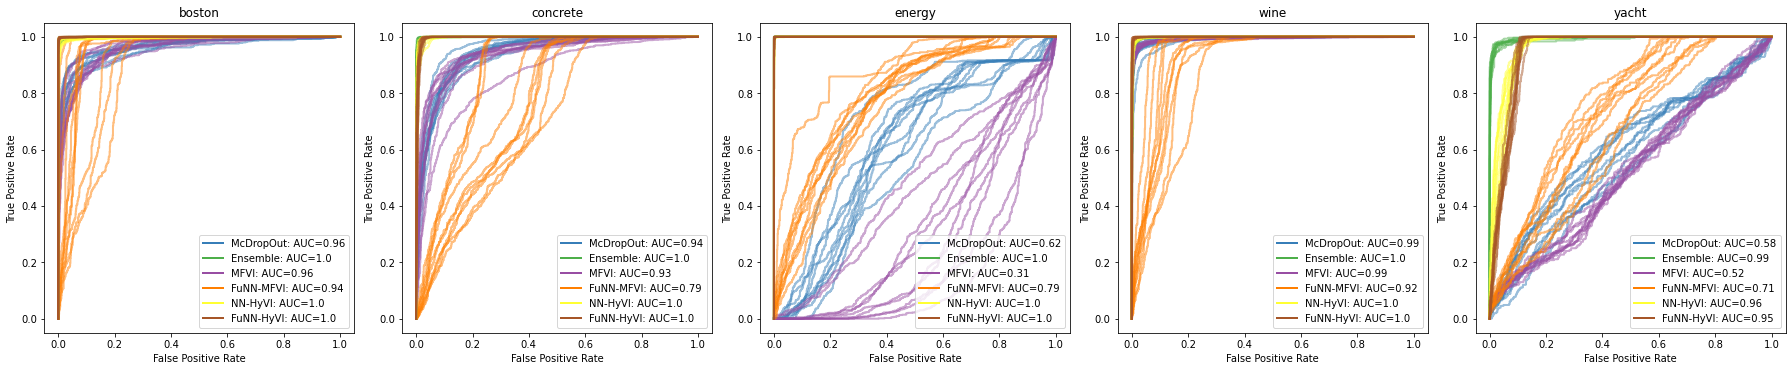

In [18]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in range(10):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+': AUC={}'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig("Results/Exp2/ROC.pdf", bbox_inches='tight', dpi=600)

plt.show()

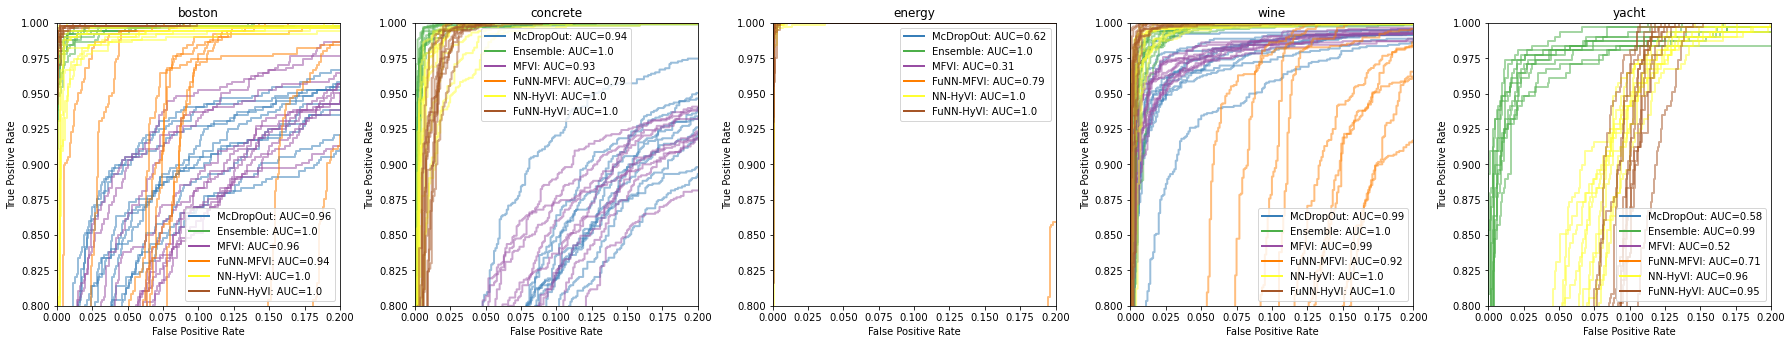

In [21]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in range(10):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_xlim(0.,0.2)
            ax[d].set_ylim(0.8,1.0)
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+': AUC={}'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig("Results/Exp2/ROC_zoom.pdf", bbox_inches='tight', dpi=600)

plt.show()

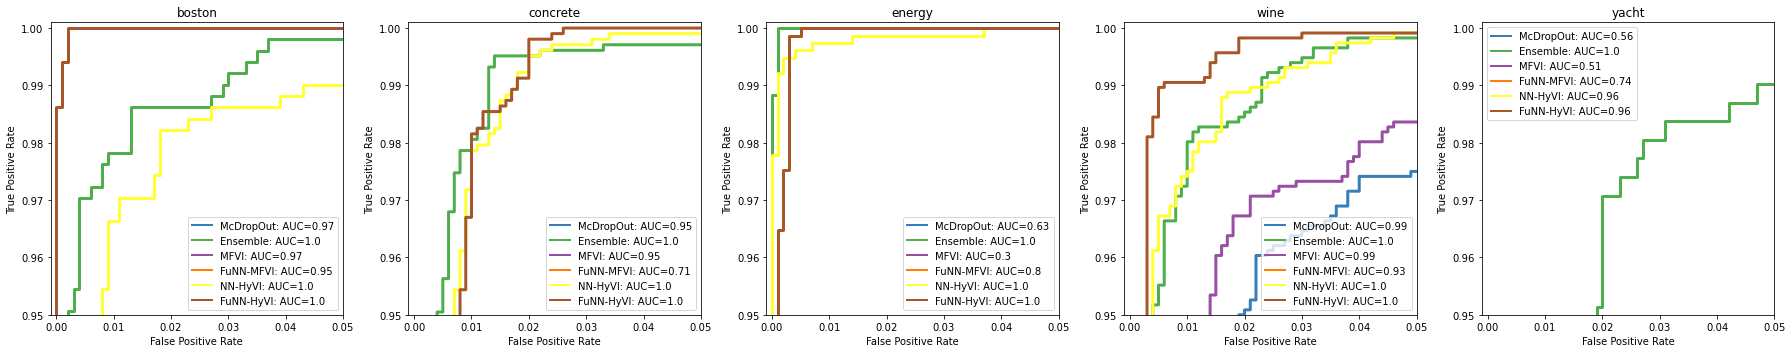

In [29]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in [4]:#range(1):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=3,color=cmap(m+1), alpha=1.)#ROC
            ax[d].set_xlim(-0.001,0.05)
            ax[d].set_ylim(0.95,1.001)
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+': AUC={}'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig("Results/Exp2/ROC_zoom2.pdf", bbox_inches='tight', dpi=600)

plt.show()

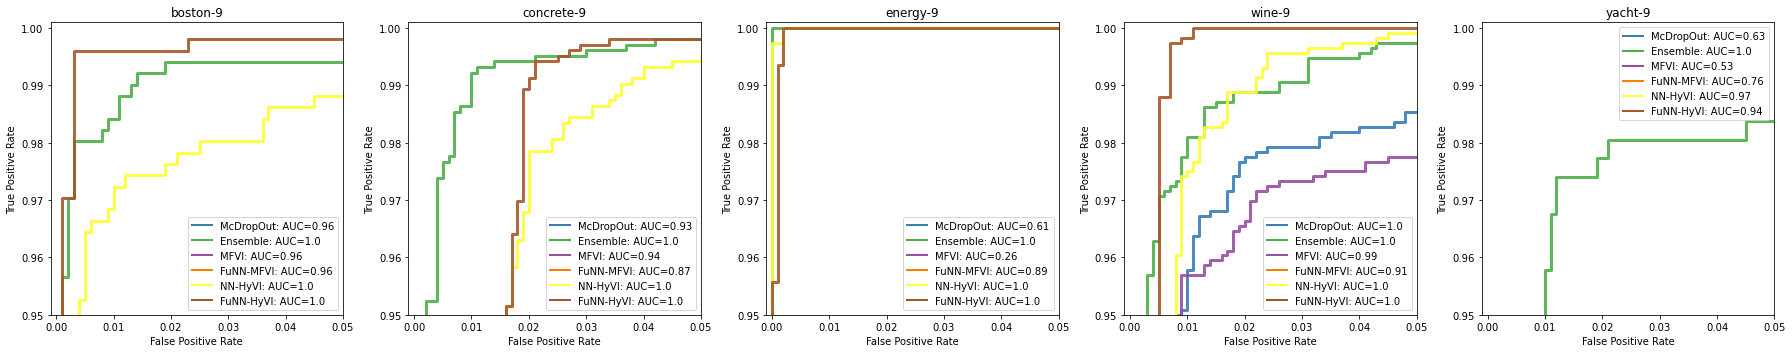

In [44]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=9
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        data=[]
        for nb_split in [nb_split]:#range(1):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=True)
            ax[d].plot(fpr,tpr, lw=3,color=cmap(m+1), alpha=.9)#ROC
            ax[d].set_xlim(-0.001,0.05)
            ax[d].set_ylim(0.95,1.001)
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+': AUC={}'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset+"-{}".format(nb_split))
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
fig.savefig("Results/Exp2/ROC_zoom2.pdf", bbox_inches='tight', dpi=600)
plt.show()

In [73]:
import copy
from scipy.stats import wilcoxon
wil=copy.deepcopy(Entropy)

for dataset, dic in Entropy.items():
    custom_text=[]
    for method, Hs in dic.items():
        for nb_split in range(1):
            H=Hs[nb_split]
            y_true=torch.cat([H[0],H[1]]).cpu()
            y_false=H[2].cpu()
            diff=np.longdouble((y_false-y_true.unsqueeze(-1)).view(-1))
            #print(diff)
            w=wilcoxon(diff, alternative='greater')
            #print(w[1])
        wil[dataset][method]=w

In [74]:
pd.DataFrame(wil)

,boston,concrete,energy,wine,yacht
McDropOut,"(127450154958.5, 0.0)","(519577717015.5, 0.0)","(178218250776.0, 0.0)","(672690709311.0, 0.0)","(30218845598.5, 0.0)"
Ensemble,"(128017868843.0, 0.0)","(530449012454.0, 0.0)","(294912383997.0, 0.0)","(672770728476.0, 0.0)","(47421786361.0, 0.0)"
MFVI,"(127145419435.0, 0.0)","(520674733541.5, 0.0)","(19872446886.5, 1.0)","(672660995951.5, 0.0)","(25833758369.0, 0.0)"
FuNN-MFVI,"(127940624338.5, 0.0)","(510866882502.0, 0.0)","(254996104237.5, 0.0)","(669340433197.5, 0.0)","(33603027315.5, 0.0)"
NN-HyVI,"(128013314760.5, 0.0)","(530397410413.0, 0.0)","(294912383190.0, 0.0)","(672800487417.0, 0.0)","(47319686575.0, 0.0)"
FuNN-HyVI,"(128018108064.0, 0.0)","(530374175509.0, 0.0)","(294912334031.0, 0.0)","(672800276951.0, 0.0)","(46995260022.0, 0.0)"


In [75]:
import copy
from scipy.stats import wasserstein_distance
wass=copy.deepcopy(Entropy)

for dataset, dic in Entropy.items():
    custom_text=[]
    for method, Hs in dic.items():
        for nb_split in range(1):
            H=Hs[nb_split]
            y_true=torch.cat([H[0],H[1]]).cpu()
            y_false=H[2].cpu()
            w=wasserstein_distance(y_true,y_false)
        wass[dataset][method]=w

In [76]:
pd.DataFrame(wass).transpose().style.highlight_max(axis=1)

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI
boston,1.257,2.983,0.852,2.627,2.221,7.259
concrete,0.836,2.491,0.587,8.356,3.272,7.109
energy,0.142,3.648,1.902,3.399,4.671,11.179
wine,1.498,2.159,1.203,8.160,2.574,6.986
yacht,0.205,2.678,0.048,1.784,3.322,8.521


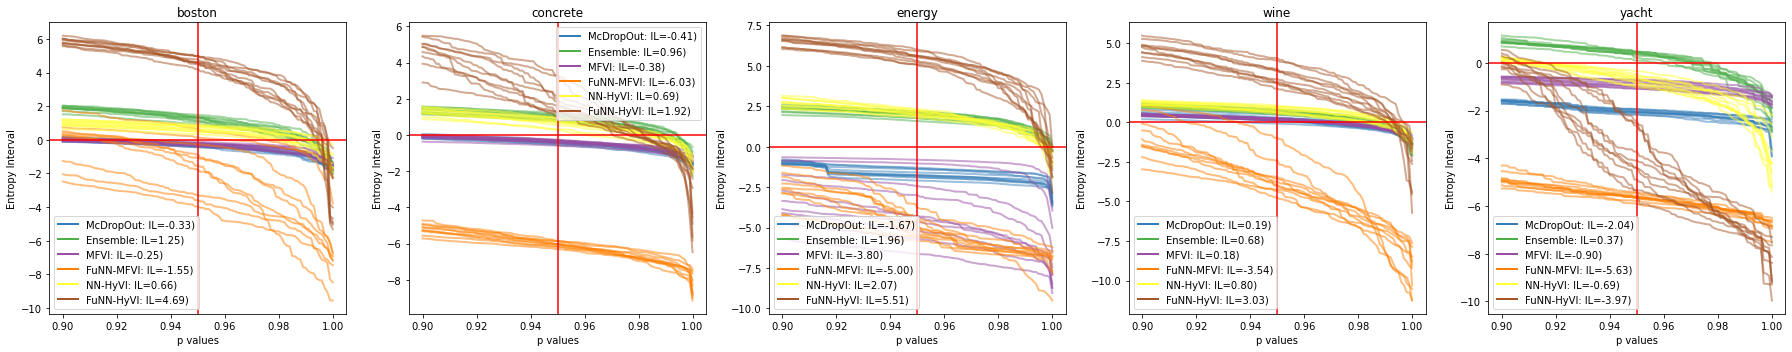

In [56]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        IntervalLength=[]
        for nb_split in range(10):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            p_values=np.linspace(0.9,1.,101)
            #print(p_values[50])
            #print(tpr,thresholds)
            tp_above=np.asarray(tpr>=np.expand_dims(p_values,-1))
            index_min_tp_above_per_p_value=[np.nonzero(tp_above[i])[0].min() for i in range(101)]
            tp_thresh_values=np.array([thresholds[i] for i in index_min_tp_above_per_p_value])
            tn_above=np.asarray(1-fpr>=np.expand_dims(p_values,-1))
            index_min_tn_above_per_p_value=[np.nonzero(tn_above[i])[0].max() for i in range(101)]
            tn_thresh_values=np.array([thresholds[i] for i in index_min_tn_above_per_p_value])
            ax[d].plot(p_values, tp_thresh_values-tn_thresh_values, lw=2,color=cmap(m+1), alpha=0.5)
       #     ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
       #     ax[d].set_aspect('equal', adjustable='box')
            IntervalLength.append(tp_thresh_values[50]-tn_thresh_values[50])
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+': IL={:.2f})'.format(np.mean(IntervalLength)))
    ax[d].axhline(0., color='red')
    ax[d].axvline(0.95, color='red')


    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('p values')
    ax[d].set_ylabel('Entropy Interval')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
fig.savefig("Results/Exp2/IntervalLength.pdf", bbox_inches='tight', dpi=600)

plt.show()

# Exp 2 large

In [45]:
RESULTS, STDS=torch.load('Results/Exp2/UCI_large_Exp2_2020-11-06-01:42_metrics.pt')

for key in RESULTS.keys():
    print(key)

kin8nm
navalC
powerplant
protein


In [79]:
for dataset in RESULTS.keys():
    RESULTS[dataset].update(FBNN[dataset])
    #RESULTS[dataset].update(RESULTS_[dataset])

for dataset in STDS.keys():
    STDS[dataset].update(sFBNN[dataset])

In [80]:
res=pd.DataFrame(RESULTS).transpose()

In [81]:
stds=pd.DataFrame(STDS).transpose()

In [82]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI', 'FBNN']
res

Ensemble                             McDropOut                  \
                 RMSE     LPP time [s] std noise       RMSE    LPP time [s]   
kin8nm      7.166e-02  -2.056  147.343       0.0  8.044e-02  1.152  118.659   
navalC      3.975e-04   5.532  215.542       0.0  9.468e-04  4.641  172.041   
powerplant  3.982e+00 -56.471  173.251       0.0  4.051e+00 -2.836  139.131   
protein     4.105e+00 -13.417  843.636       0.0  4.433e+00 -3.882  746.224   

                        NN-HyVI         ...       MFVI                   \
           std noise       RMSE    LPP  ...       RMSE    LPP  time [s]   
kin8nm         0.253  6.978e-02  1.230  ...  8.118e-02  1.088   302.023   
navalC         0.229  2.234e-04  6.992  ...  4.330e-04  6.320   514.425   
powerplant     0.268  3.917e+00 -2.785  ...  4.051e+00 -2.819   201.961   
protein        0.320  4.170e+00 -2.847  ...  4.292e+00 -2.876  1199.635   

                      FuNN-MFVI                                  FBNN         
           std noise       RMSE    LPP  time [s] std noise       RMSE    LPP  
kin8nm         0.278  7.432e-02  1.164   168.190     0.243        NaN    NaN  
navalC         0.032  6.075e-04  6.030   442.824     0.042  1.200e-04  7.130  
powerplant     0.228  3.976e+00 -2.801   152.107     0.227        NaN    NaN  
protein        0.687  4.172e+00 -2.848  1195.537     0.664  4.326e+00 -2.892  

[4 rows x 26 columns]

In [83]:
import numpy as np
metrics=['RMSE']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(5)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
res[index].style.highlight_min(axis=1)    
#print(res_[index].to_latex())

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI,FBNN
,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE
kin8nm,0.080,0.072,0.081,0.074,0.070,0.071,nan
navalC,0.001,0.000,0.000,0.001,0.000,0.000,0.000
powerplant,4.051,3.982,4.051,3.976,3.917,3.913,nan
protein,4.433,4.105,4.292,4.172,4.170,4.152,4.326


In [84]:
metrics=['LPP']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
res[index].round(2).style.highlight_max(axis=1)        
#print(res_[index].to_latex())

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI,FBNN
,LPP,LPP,LPP,LPP,LPP,LPP,LPP
kin8nm,1.150,-2.060,1.090,1.160,1.230,1.190,nan
navalC,4.640,5.530,6.320,6.030,6.990,7.120,7.130
powerplant,-2.840,-56.470,-2.820,-2.800,-2.790,-2.790,nan
protein,-3.880,-13.420,-2.880,-2.850,-2.850,-2.840,-2.890


In [85]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
metrics=['time [s]']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round().astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round()).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
    
print(res_[index].to_latex())

\begin{tabular}{lllllll}
\toprule
{} &  McDropOut &   Ensemble &         MFVI &    FuNN-MFVI &     NN-HyVI &   FuNN-HyVI \\
{} &   time [s] &   time [s] &     time [s] &     time [s] &    time [s] &    time [s] \\
\midrule
kin8nm     &  119.0±0.0 &  147.0±0.0 &   302.0±12.0 &    168.0±3.0 &    89.0±3.0 &   145.0±7.0 \\
navalC     &  172.0±0.0 &  216.0±0.0 &   514.0±12.0 &   443.0±17.0 &   208.0±4.0 &   433.0±6.0 \\
powerplant &  139.0±0.0 &  173.0±0.0 &    202.0±4.0 &    152.0±8.0 &    90.0±2.0 &   145.0±5.0 \\
protein    &  746.0±1.0 &  844.0±0.0 &  1200.0±38.0 &  1196.0±20.0 &  538.0±14.0 &  986.0±22.0 \\
\bottomrule
\end{tabular}



## large : Predictive Epistemic Entropy #

In [86]:
Entropy=torch.load('Results/Exp2/UCI_large_Exp2_2020-11-06-01:42_entropy.pt')

In [87]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
datasets=['kin8nm', 'navalC', 'powerplant', 'protein']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()


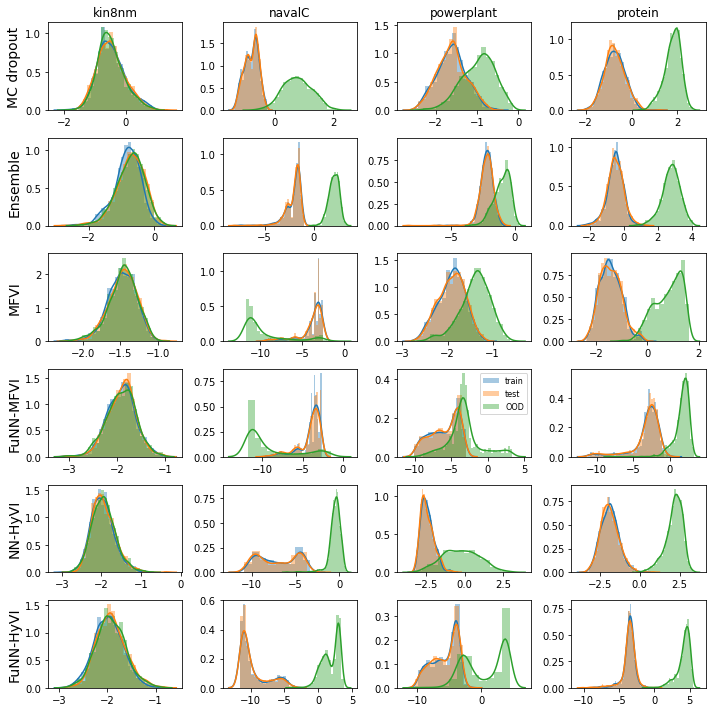

In [88]:
from Models import get_mlp
from torch import nn


import seaborn as sns
from pylab import *

#predictive model
layerwidth=100
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=len(datasets)
n_methods=len(methods)
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,10),squeeze=False)


method_names=['MC dropout','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']

label=['train', 'test', 'OOD']
split=0

d=0
for dataset, dic in Entropy.items():
    m=0
    ax[m,d].set_title(dataset)
    for method, Hs in dic.items():
        H=Hs[split]
        for i in range(len(H)):
            sns.distplot(H[i].cpu(), label=label[i], ax=ax[m,d], kde=True)#, color=colors[i])#, hist=False, norm_hist=True)#color=colors[i],
            if d ==0:
                if method=='FuNNeVI' or method== 'GeNNeVI':
                    ax[m,d].set_ylabel(method_names[m], {'fontweight':'bold'})
                else:
                    ax[m,d].set_ylabel(method_names[m])
        m+=1
        
    d+=1
ax[3,2].legend(loc='upper right', prop={'size': 8})#bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
plt.savefig("Results/Exp2/UCIlarge_PredictiveEntropy_Exp2.pdf", dpi=600)
#plt.subplots_adjust(top=.9)
#plt.suptitle('Posterior Predictive Entropy Distributions')
plt.show()

## Accuracy in OOD detection

In [46]:
Entropy=torch.load('Results/Exp2/UCI_large_Exp2_2020-11-06-01:42_entropy.pt')
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
#methods=['Ensemble','NN-HyVI','FuNN-HyVI']

datasets=['kin8nm', 'navalC', 'powerplant', 'protein']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()


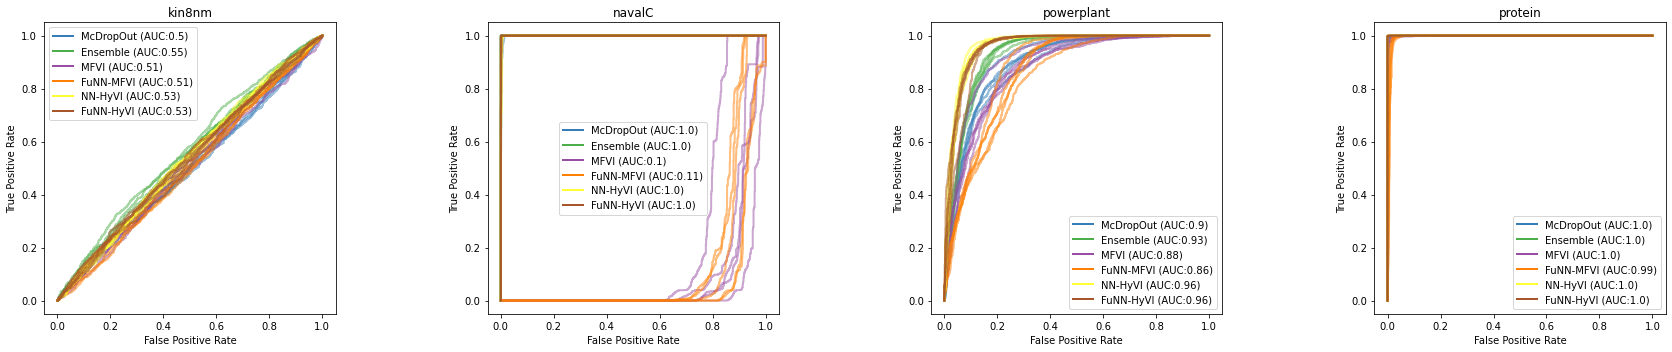

In [47]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=4
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in range(5):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+' (AUC:{})'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig("Results/Exp2/ROC_largeUCI.pdf", bbox_inches='tight', dpi=600)

plt.show()

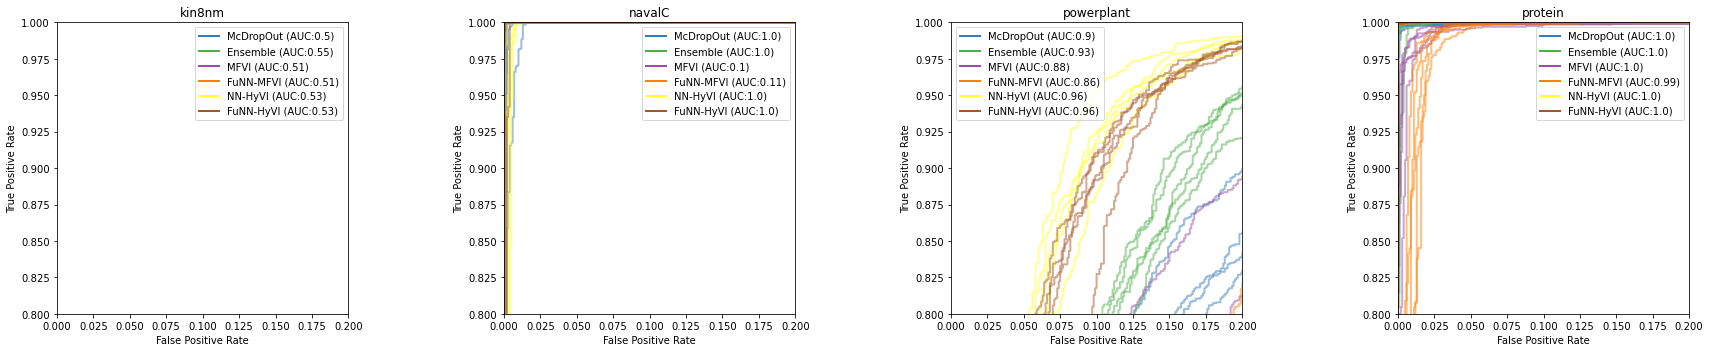

In [48]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=4
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in range(5):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_xlim(0.,0.2)
            ax[d].set_ylim(0.8,1.0)
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+' (AUC:{})'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig("Results/Exp2/ROC_largeUCI_zoom.pdf", bbox_inches='tight', dpi=600)

plt.show()

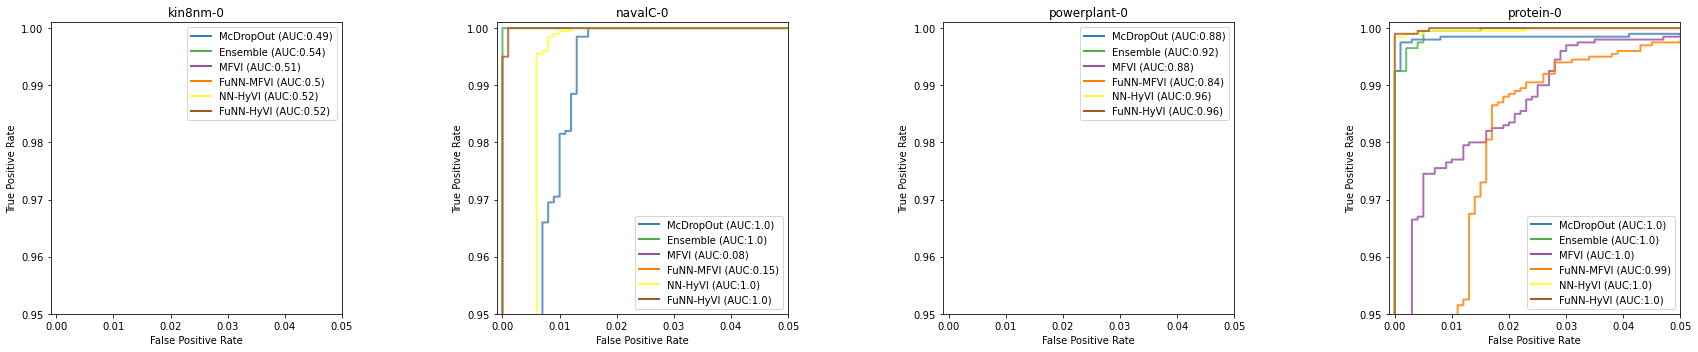

In [53]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=4
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in [nb_split]:#range(5):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.8)#ROC
            ax[d].set_xlim(-0.001,0.05)
            ax[d].set_ylim(0.95,1.001)
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+' (AUC:{})'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset+"-{}".format(nb_split))
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig("Results/Exp2/ROC_largeUCI_zoom2.pdf", bbox_inches='tight', dpi=600)

plt.show()

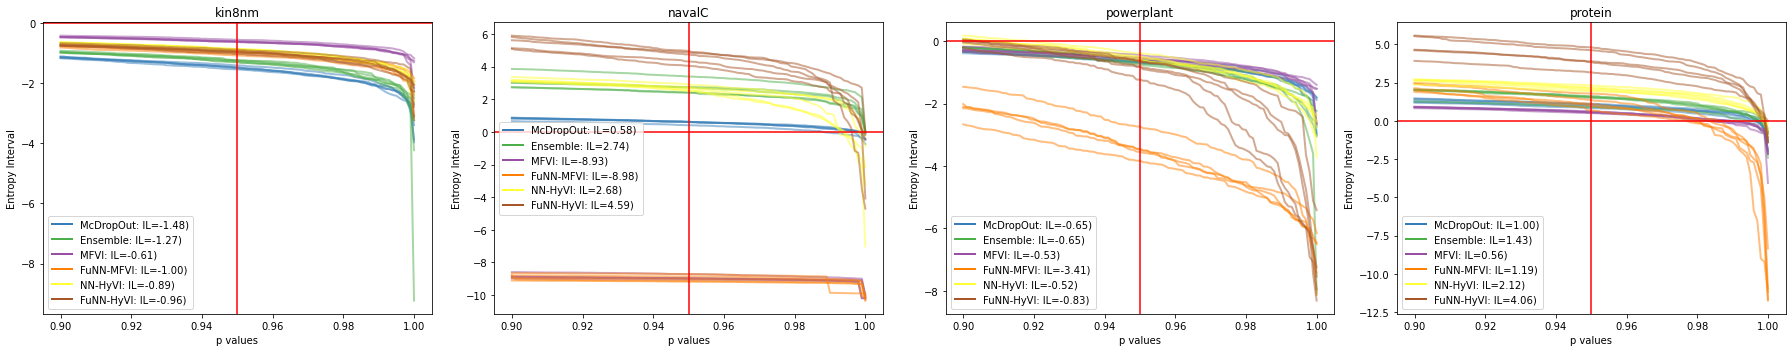

In [54]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=4
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        IntervalLength=[]
        for nb_split in range(5):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            p_values=np.linspace(0.9,1.,101)
            #print(p_values[50])
            #print(tpr,thresholds)
            tp_above=np.asarray(tpr>=np.expand_dims(p_values,-1))
            index_min_tp_above_per_p_value=[np.nonzero(tp_above[i])[0].min() for i in range(101)]
            tp_thresh_values=np.array([thresholds[i] for i in index_min_tp_above_per_p_value])
            tn_above=np.asarray(1-fpr>=np.expand_dims(p_values,-1))
            index_min_tn_above_per_p_value=[np.nonzero(tn_above[i])[0].max() for i in range(101)]
            tn_thresh_values=np.array([thresholds[i] for i in index_min_tn_above_per_p_value])
            ax[d].plot(p_values, tp_thresh_values-tn_thresh_values, lw=2,color=cmap(m+1), alpha=0.5)
       #     ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
       #     ax[d].set_aspect('equal', adjustable='box')
            IntervalLength.append(tp_thresh_values[50]-tn_thresh_values[50])
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+': IL={:.2f})'.format(np.mean(IntervalLength)))
    ax[d].axhline(0., color='red')
    ax[d].axvline(0.95, color='red')


    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('p values')
    ax[d].set_ylabel('Entropy Interval')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
fig.savefig("Results/Exp2/IntervalLength_large.pdf", bbox_inches='tight', dpi=600)

plt.show()

# Synthetic Data Set: Wave OOS #

In [94]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

x_pred=torch.linspace(-4.,2.,500).unsqueeze(-1).to(device)

setup_ = get_setup('foong')
setup=setup_.Setup(device) 


x_train, y_train=setup.train_data()

def PlotFoong(ax, method, y_pred, x_pred=x_pred,  x=x_train, y=y_train, device=device):
 
    parameters = {'axes.labelsize':18,
                  'axes.titlesize': 18,
                  'xtick.labelsize' : 15,
                  'ytick.labelsize' : 15,
                  'figure.titlesize':14}


    plt.rcParams.update(parameters)
    
    N=y_pred.shape[0]
    m_3=int(0.001*N)
    M_3=N-m_3
    m_2=int(0.021*N)
    M_2=N-m_2
    m_1=int(0.136*N)
    M_1=N-m_1

    x_pred=x_pred.squeeze()

    pred,_=y_pred.sort(dim=0)
    y_mean=y_pred.mean(dim=0).squeeze().cpu()
    y_3=pred[m_3,:].squeeze().cpu()
    Y_3=pred[M_3,:].squeeze().cpu()
    y_2=pred[m_2,:].squeeze().cpu()
    Y_2=pred[M_2,:].squeeze().cpu()    
    y_1=pred[m_1,:].squeeze().cpu()
    Y_1=pred[M_1,:].squeeze().cpu()

    

    ax.plot(x_pred.cpu(), torch.cos(4.0*(x_pred+0.2)).cpu(),'--', linewidth=1., color='darkcyan')
    color='springgreen'#'darkgreen'#'dodgerblue'#
#    ax.fill_between(x_pred.cpu(), y_3, Y_3, facecolor=color, alpha=0.3)
#    ax.fill_between(x_pred.cpu(), y_2, Y_2, facecolor=color, alpha=0.2)
#    ax.fill_between(x_pred.cpu(), y_1, Y_1, facecolor=color, alpha=0.1)
    
    ax.fill_between(x_pred.cpu(), Y_2, Y_3, facecolor='springgreen', alpha=0.2)
    ax.fill_between(x_pred.cpu(), Y_1, Y_2, facecolor='springgreen', alpha=0.4)
    ax.fill_between(x_pred.cpu(), y_1, Y_1, facecolor='springgreen', alpha=0.7)
    ax.fill_between(x_pred.cpu(), y_2, y_1, facecolor='springgreen', alpha=0.4)
    ax.fill_between(x_pred.cpu(), y_3, y_2, facecolor='springgreen', alpha=0.2)

    ax.set_yticks([-3,0,3])
    ax.set_xticks([-3,-2,-1,0,1])
    ax.grid(True, which='major', linewidth=0.5)
    ax.set_ylim(-5, 5)
    ax.set_xlim(-4.,2.)
    if method == 'NN-HyVI' or method =='FuNN-HyVI':
        ax.set_title(method, {'fontweight':'bold'})
    else:
        ax.set_title(method)
    ax.scatter(x.cpu(), y.cpu() , marker='.',linewidth=.5, color='black',zorder=4)
    ax.plot(x_pred.cpu(), y_mean, color='darkgreen', linewidth=1.)

    return fig


In [95]:
x_pred,Wave=torch.load('Results/NEW/WaveOOD_2020-10-22-00:49.pt')
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI', 'HMC']
#df=pd.DataFrame(Wave,index=methods)

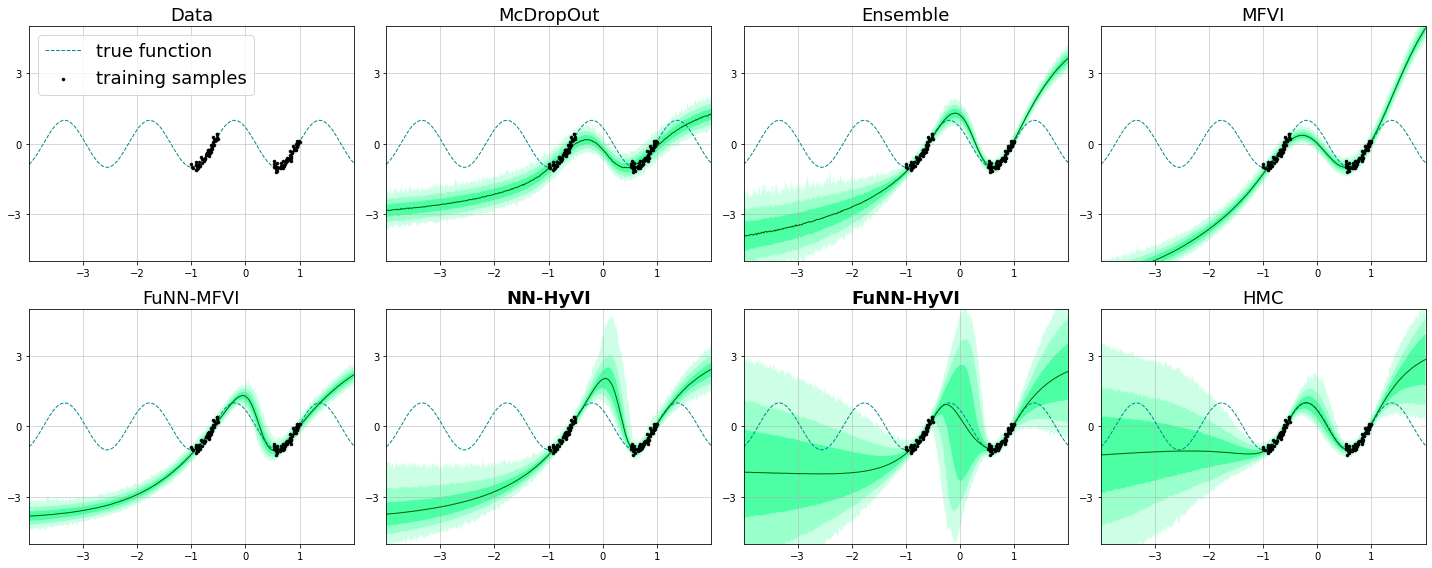

In [96]:
from pylab import *
fig, ax=plt.subplots(2,4, figsize=(20,8))


method_names=['MC dropout','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','HMC','FuNN-HyVI']


parameters = {'axes.labelsize':18,
              'axes.titlesize': 18,
              'xtick.labelsize' : 18,
              'ytick.labelsize' : 18,
              'figure.titlesize':14}

plt.rcParams.update(parameters)

ax.flat[0].plot(x_pred.cpu(), torch.cos(4.0*(x_pred+0.2)).cpu(),'--', linewidth=1., color='darkcyan', label='true function')

ax.flat[0].set_yticks([-3,0,3])
ax.flat[0].set_xticks([-3,-2,-1,0,1])
ax.flat[0].grid(True, which='major', linewidth=0.5)
ax.flat[0].set_ylim(-5, 5)
ax.flat[0].set_xlim(-4.,2.)
ax.flat[0].set_title('Data')
ax.flat[0].scatter(x_train.cpu(), y_train.cpu() , marker='.', linewidth=.5,  label='training samples',color='black',zorder=4)
ax.flat[0].legend(loc='upper left', prop={'size': 18})
i=1
for method in methods:
    y=Wave[method]
    PlotFoong(ax.flat[i],method,y, x_pred=x_pred)
    i+=1

fig.tight_layout()#h_pad=3., w_pad=3.)
plt.savefig('Results/NEW/WAVE.pdf', dpi=600)


# Isotropic Gaussian example #

In [44]:
from torch.distributions import MultivariateNormal as MV

N=200
#certain=MV(torch.zeros(N), covariance_matrix=0.1*torch.eye(N))
uncertain=MV(torch.zeros(N), covariance_matrix=.1*torch.eye(N))
sigmas=torch.linspace(0.03, .35, 20)
uTm=torch.Tensor(20)
cTm=torch.Tensor(20)
mTu=torch.Tensor(20)
mTc=torch.Tensor(20)
for i in range(20):
    middle=MV(torch.zeros(N), covariance_matrix=sigmas[i]*torch.eye(N))
    uTm[i]=torch.distributions.kl.kl_divergence(uncertain,middle)
#    cTm[i]=torch.distributions.kl.kl_divergence(certain,middle)
    mTu[i]=torch.distributions.kl.kl_divergence(middle,uncertain)
#    mTc[i]=torch.distributions.kl.kl_divergence(middle,certain)


In [45]:
uTm, cTm

(tensor([1.1294e+02, 3.7644e+01, 1.1901e+01, 2.5244e+00, 3.5950e-02, 8.4497e-01,
         3.3481e+00, 6.7487e+00, 1.0621e+01, 1.4725e+01, 1.8920e+01, 2.3124e+01,
         2.7286e+01, 3.1376e+01, 3.5377e+01, 3.9279e+01, 4.3078e+01, 4.6771e+01,
         5.0360e+01, 5.3848e+01]),
 tensor([1.0089e-43, 0.0000e+00, 1.2948e-42, 0.0000e+00, 2.0039e-43, 0.0000e+00,
         1.2948e-42, 0.0000e+00, 2.0039e-43, 0.0000e+00, 2.0921e-42, 0.0000e+00,
         2.6765e-43, 0.0000e+00, 2.0921e-42, 0.0000e+00, 2.6765e-43, 0.0000e+00,
         0.0000e+00, 0.0000e+00]))

In [46]:
from pylab import *
import matplotlib.pyplot as plt

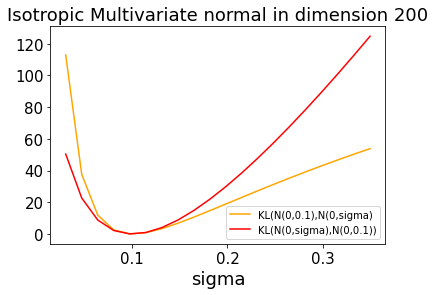

In [47]:
plt.plot(sigmas,uTm, label='KL(N(0,0.1),N(0,sigma)', color='orange')
plt.plot(sigmas,mTu, label='KL(N(0,sigma),N(0,0.1))',color='red')

#plt.plot(sigmas,cTm, label='KL(N(0,0.1),N(0,sigma))',color='blue')
#plt.plot(sigmas,mTc, label='KL(N(0,sigma),N(0,0.1))', color='green')

plt.xlabel('sigma')
plt.title('Isotropic Multivariate normal in dimension {}'.format(N))
plt.legend()

In [48]:
from torch.distributions import MultivariateNormal as MV

N=200
small=0.1
medium=0.5
large=2.
certain=MV(torch.zeros(N), covariance_matrix=small*torch.eye(N))
middle=MV(torch.zeros(N), covariance_matrix=medium*torch.eye(N))
uncertain=MV(torch.zeros(N), covariance_matrix=large*torch.eye(N))
print('KL(N(0,large*I),N(0,medium*I): {}'.format(torch.distributions.kl.kl_divergence(uncertain,middle)))
print('KL(N(0,sigma),N(0,1)): {}'.format(torch.distributions.kl.kl_divergence(middle,uncertain)))
print('mean: {}'.format(0.5*torch.distributions.kl.kl_divergence(uncertain,middle)+0.5*torch.distributions.kl.kl_divergence(middle,uncertain)))
print('KL(N(0,0.1),N(0,sigma)): {}'.format(torch.distributions.kl.kl_divergence(certain,middle)))
print('KL(N(0,sigma),N(0,0.1)): {}'.format(torch.distributions.kl.kl_divergence(middle,certain)))
print('mean: {}'.format(0.5*torch.distributions.kl.kl_divergence(certain,middle)+0.5*torch.distributions.kl.kl_divergence(middle,certain)))

KL(N(0,large*I),N(0,medium*I): 161.37054443359375
KL(N(0,sigma),N(0,1)): 63.629425048828125
mean: 112.49998474121094
KL(N(0,0.1),N(0,sigma)): 80.94381713867188
KL(N(0,sigma),N(0,0.1)): 239.05618286132812
mean: 160.0
